<h1><center><font color="gray" size="15">Case Study 11: Cost sensitive learning

<h1><center><font color="selver" >Ahmad  Sami Mohamed - Data Science 

> *******

- ## Introduction:
    - In this artical we will explor several performance measures on imbalance datasets.
    - For Card Fraud Detection Using random forest classifier to detect credit frauds from the dataset with deffirent cases.
    - For Mammography dataset we will use knn classification algorithm with k=30.
    - Performance measures that we want to get are: "<b>Balanced accuracy</b>", "<b>F1-Score</b>", "<b>G-Mean</b>", "<b>Average Precision Score (APS)</b>"
   

- ### Imbalanced Data:
<img src="references/imbalanced data.webp">

-  Classification is one of the most common machine learning problems. The best way to approach any classification problem is to start by analyzing and exploring the dataset in what we call Exploratory Data Analysis (EDA). The sole purpose of this exercise is to generate as many insights and information about the data as possible. It is also used to find any problems that might exist in the dataset. One of the common issues found in datasets that are used for classification is imbalanced classes issue.

- ### What Is Data Imbalance?
    - Data imbalance usually reflects an unequal distribution of classes within a dataset. For example, in a credit card fraud detection dataset, most of the credit card transactions are not fraud and a very few classes are fraud transactions. This leaves us with something like 50:1 ratio between the fraud and non-fraud classes,  In this article, we will show multicases to highlight the problem and the solutions.

***

## <u>Implementation</u>:

Exploring the data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from functions import *
df = pd.read_csv("Data/creditcard.csv")

In [2]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

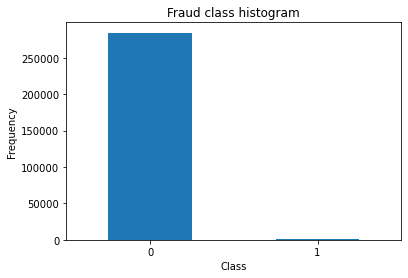

In [18]:
bar_func(df['Class'])

### Clearly the data is totally unbalanced.<br>

- ## Splitting data into train and test set:

In [4]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,1:df.shape[1]-1]
y = df.iloc[:,df.shape[1]-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
NT_train = len(X_train)
NT_test = len(X_test)
print("Number transactions train dataset:", NT_train)
print("Number transactions test dataset: ", NT_test)
print("Total number of transactions:     ", NT_train+NT_test)

Number transactions train dataset: 199364
Number transactions test dataset:  85443
Total number of transactions:      284807


- <b><u>Using unbalanced RandomForestClassifier approach</u></b>, This is usual Random forest classifier which is the default in scikit-learn. All transactions regardless of label are weighted the same.

TN:85289 FP:7 FN:39 TP:108 FNR=0.2653061224489796 FPR=8.206715438004127e-05


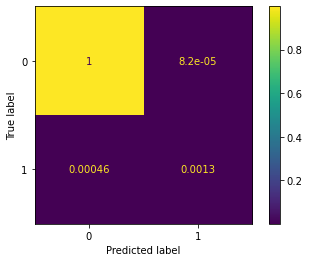

In [5]:
show(*confusion(RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=10).fit(X_train,y_train),X_test,y_test))

Clearly, the false negative rate is much higher than the false positive rate. This demonstrates the inherent bias toward classification of the majority class in this unbalanced data set.

- <b><u>Using balanced RandomForestClassifier approach</u></b>, Weights are inversely proportional with the frequency of class observaton.

<img src="references/img1.PNG">

TN:85293 FP:3 FN:41 TP:106 FNR=0.2789115646258503 FPR=3.517163759144626e-05


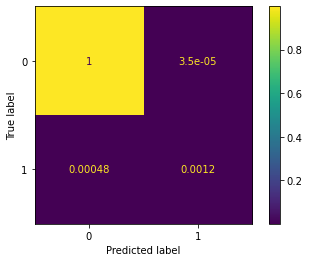

In [6]:
show(*confusion(RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=10, class_weight="balanced").fit(X_train,y_train),X_test,y_test))

This makes only a small difference, and again, the tradeoff between the false positive rate and the false negative rate is an arbitrary one.

---

## 1- Baseline training with the original data (RF):

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from functions import *

In [2]:
# Read the data
df_1 = pd.read_csv("Data/creditcard.csv")

In [3]:
X_1 = df_1.iloc[:,1:df_1.shape[1]-1]
y_1 = df_1.iloc[:,df_1.shape[1]-1]
# Split the data 80:20
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,y_1,test_size = 0.2, random_state = 0)

Draw class histogram befor applying the model:

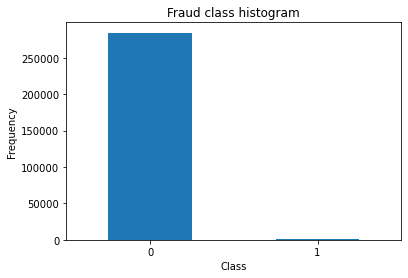

In [4]:
# Show Histogram of the output
bar_func(df_1['Class'])

In [5]:
# Intiate the model
Case1_model = RandomForestClassifier()
# apply the model on the data
model_1 = Case1_model.fit(X_train_1,y_train_1)
# prefict using the model
y_pred_1  = model_1.predict(X_test_1)

In [6]:
# Get the accuracy measures:
from sklearn.metrics import balanced_accuracy_score , f1_score ,  average_precision_score
from imblearn.metrics import geometric_mean_score
Rf_Model_1 = getAccuracyMeasures(y_test_1, y_pred_1)
print("balanced_accuracy_score_1 :", Rf_Model_1[0])
print("f1_score_1                :", Rf_Model_1[1])
print("geometric_mean_score_1    :", Rf_Model_1[2])
print("average_precision_score_1 :", Rf_Model_1[3])

balanced_accuracy_score_1 : 0.8959868437205128
f1_score_1                : 0.855614973262032
geometric_mean_score_1    : 0.8899413617439967
average_precision_score_1 : 0.7371865346638136


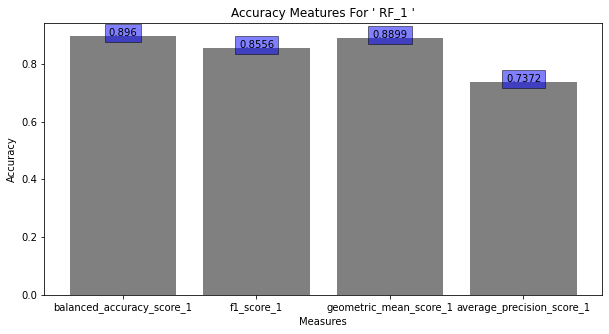

In [7]:
x = ["balanced_accuracy_score_1", "f1_score_1", "geometric_mean_score_1","average_precision_score_1"]
y = [round(Rf_Model_1[0],4), round(Rf_Model_1[1],4), round(Rf_Model_1[2],4), round(Rf_Model_1[3],4)]
barPlotChart(x,y, " RF_1 ")

we notice that we get high accuracy in the balanced score, but we can't accept it, It's trickery because the data is imbalanced.

*****

## 2- No oversampling and Using cost sensitive random forest (RF: 10:1):

In [8]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from functions import *
# Read the data
df_2 = pd.read_csv("Data/creditcard.csv")
X_2 = df_2.iloc[:,1:df_2.shape[1]-1]
y_2 = df_2.iloc[:,df_2.shape[1]-1]
# Split the data
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2,y_2,test_size = 0.2, random_state = 0) 

df_2

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

- Scatter plot:

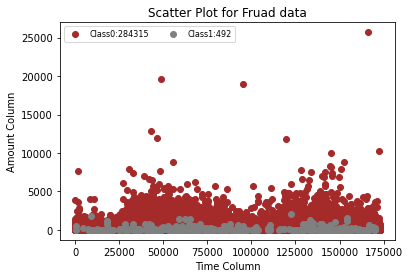

In [10]:
Scatter_plot(df_2,y_2)

- the data is clearly imbalanced.

In [11]:
# Class weight (Cost of minority class: majority class 10:1)
class_weight_2 = {0: 1, 1: 10}
# Intiate the model
Case2_model = RandomForestClassifier(class_weight = class_weight_2)
# apply the model on the data
model_2 = Case2_model.fit(X_train_2,y_train_2)
# prefict using the model
y_pred_2  = model_2.predict(X_test_2)

In [12]:
# Get the accuracy measures:
from sklearn.metrics import balanced_accuracy_score , f1_score ,  average_precision_score
from imblearn.metrics import geometric_mean_score
Rf_Model_2 = getAccuracyMeasures(y_test_2, y_pred_2)
print("balanced_accuracy_score_2 :", Rf_Model_2[0])
print("f1_score_2                :", Rf_Model_2[1])
print("geometric_mean_score_2    :", Rf_Model_2[2])
print("average_precision_score_2 :", Rf_Model_2[3])

balanced_accuracy_score_2 : 0.8910451420443217
f1_score_2                : 0.8540540540540541
geometric_mean_score_2    : 0.884369514383614
average_precision_score_2 : 0.7360062129643623


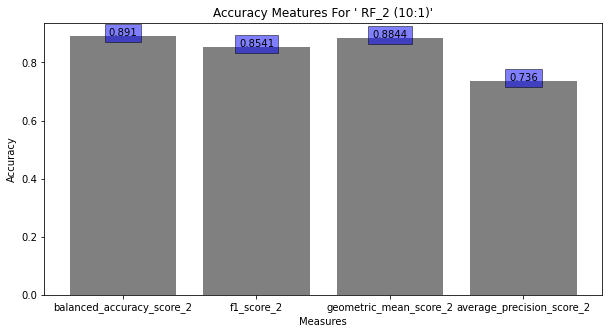

In [13]:
x = ["balanced_accuracy_score_2", "f1_score_2", "geometric_mean_score_2","average_precision_score_2"]
y = [round(Rf_Model_2[0],4), round(Rf_Model_2[1],4), round(Rf_Model_2[2],4), round(Rf_Model_2[3],4)]
barPlotChart(x,y, " RF_2 (10:1)")

- we notic here that APS score is the lowest one.

TN:56856 FP:5 FN:22 TP:79 FNR=0.21782178217821782 FPR=8.793373313870667e-05


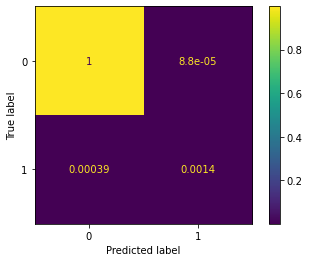

In [14]:
show(*confusion(model_2,X_test_2,y_test_2))

***********

## 3- No oversampling and Using cost sensitive random forest (RF: 100:1):

In [15]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from functions import *
# Read the data
df_3 = pd.read_csv("Data/creditcard.csv")
X_3 = df_3.iloc[:,1:df_3.shape[1]-1]
y_3 = df_3.iloc[:,  df_3.shape[1]-1]
# Split the data
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3,y_3,test_size = 0.2, random_state = 0) # 80:20 split.

# Class weight (Cost of minority class: majority class 100:1)
class_weight_3 = {0: 1, 1: 100}
# Intiate the model
Case3_model = RandomForestClassifier(class_weight = class_weight_3)
# apply the model on the data
model_3 = Case3_model.fit(X_train_3,y_train_3)
# prefict using the model
y_pred_3  = model_3.predict(X_test_3)

In [16]:
# Get the accuracy measures:
from sklearn.metrics import balanced_accuracy_score , f1_score ,  average_precision_score
from imblearn.metrics import geometric_mean_score
Rf_Model_3 = getAccuracyMeasures(y_test_3, y_pred_3)
print("balanced_accuracy_score_3 :", Rf_Model_3[0])
print("f1_score_3                :", Rf_Model_3[1])
print("geometric_mean_score_3    :", Rf_Model_3[2])
print("average_precision_score_3 :", Rf_Model_3[3])

balanced_accuracy_score_3 : 0.8860946469948168
f1_score_3                : 0.8478260869565218
geometric_mean_score_3    : 0.8787544130774654
average_precision_score_3 : 0.7261582811183942


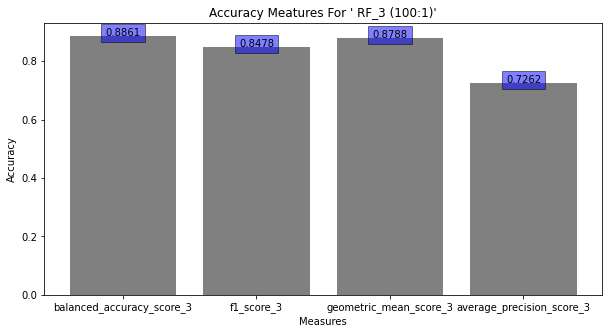

In [17]:
x = ["balanced_accuracy_score_3", "f1_score_3", "geometric_mean_score_3","average_precision_score_3"]
y = [round(Rf_Model_3[0],4), round(Rf_Model_3[1],4), round(Rf_Model_3[2],4), round(Rf_Model_3[3],4)]
barPlotChart(x,y," RF_3 (100:1)")

-  we notice that class weight 100:1 not that diffrance with class weight 10:1

TN:56856 FP:5 FN:23 TP:78 FNR=0.22772277227722773 FPR=8.793373313870667e-05


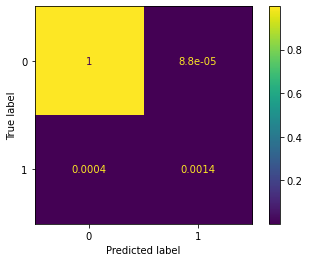

In [18]:
show(*confusion(model_3,X_test_3,y_test_3))

********

## 4- SMOTE oversampling and Using cost sensitive random forest (RF: 10:1):

In [19]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from functions import *
import warnings
warnings.filterwarnings('ignore')
# Read the data
df_4 = pd.read_csv("Data/creditcard.csv")
X_4 = df_4.iloc[:,1:df_4.shape[1]-1]
y_4 = df_4.iloc[:,  df_4.shape[1]-1]

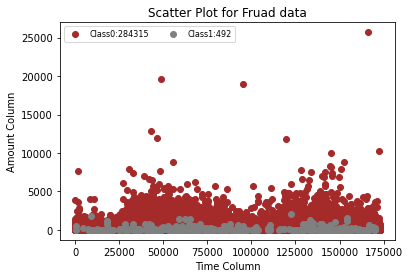

In [20]:
# Draw scatter plot before applying the Smote model:
Scatter_plot(df_4,y_4)

In [21]:
# apply the SMOTE model on the data
SMOTE_model = SMOTE()
X_4, y_4 = SMOTE_model.fit_resample(X_4, y_4)

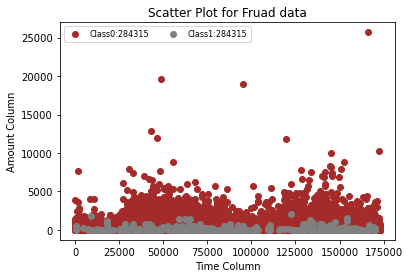

In [22]:
# plot scatter plot again to chaeck the work of Smote algorithm on the data:
Scatter_plot(df_4,y_4)

- we notic here that the data became balanced, the class 1 still showing less distribution on scatter because the data is too close to each other.

- After the data became balanced, now we will aplly the RF model again with (cost sensitive 10:1)

In [23]:
# Split the data
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4,y_4,test_size = 0.2, random_state = 0) # 80:20 split.

# Class weight (Cost of minority class: majority class 10:1)
class_weight_4 = {0: 1, 1: 10}
# Intiate the model
Case4_model = RandomForestClassifier(class_weight = class_weight_4)
# apply the model on the data
model_4 = Case4_model.fit(X_train_4,y_train_4)
# prefict using the model
y_pred_4  = model_4.predict(X_test_4)

In [24]:
# Get the accuracy measures:
from sklearn.metrics import balanced_accuracy_score , f1_score ,  average_precision_score
from imblearn.metrics import geometric_mean_score
Rf_Model_4 = getAccuracyMeasures(y_test_4, y_pred_4)
print("balanced_accuracy_score_4 :", Rf_Model_4[0])
print("f1_score_4                :", Rf_Model_4[1])
print("geometric_mean_score_4    :", Rf_Model_4[2])
print("average_precision_score_4 :", Rf_Model_4[3])

balanced_accuracy_score_4 : 0.9998942676558586
f1_score_4                : 0.9998947497675724
geometric_mean_score_4    : 0.9998942637667888
average_precision_score_4 : 0.9997983113679538


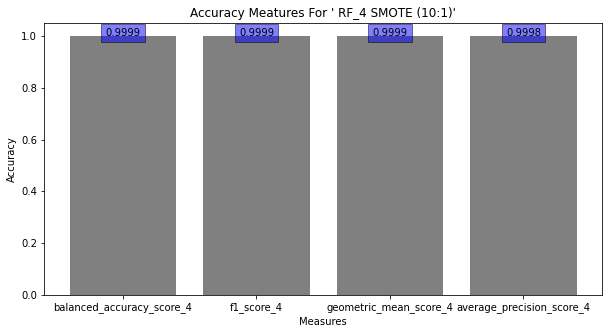

In [25]:
x = ["balanced_accuracy_score_4", "f1_score_4", "geometric_mean_score_4","average_precision_score_4"]
y = [round(Rf_Model_4[0],4), round(Rf_Model_4[1],4), round(Rf_Model_4[2],4), round(Rf_Model_4[3],4)]
barPlotChart(x,y," RF_4 SMOTE (10:1)")

- we notic here that we get higher accuracy after we apply SMOTE algotrthim because the mode has mode samples for the two classes, so it can learn for both of them, like we but for both of them the same weight, and in RF model  we determin that the class 1 is more important then class zero from the Class_weight parameter.

TN:56713 FP:11 FN:1 TP:57001 FNR=1.754324409669836e-05 FPR=0.00019392144418588252


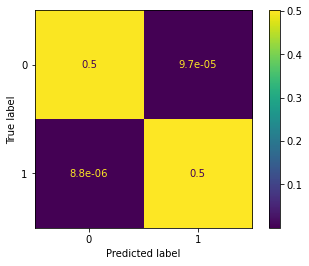

In [26]:
show(*confusion(model_4,X_test_4,y_test_4))

****************

## 5- SMOTE oversampling and Using cost sensitive random forest (RF: 100:1):

In [27]:
# Split the data
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_4,y_4,test_size = 0.2, random_state = 0) # 80:20 split.

# Class weight (Cost of minority class: majority class 10:1)
class_weight_5 = {0: 1, 1: 100}
# Intiate the model
Case5_model = RandomForestClassifier(class_weight = class_weight_5)
# apply the model on the data
model_5 = Case5_model.fit(X_train_5,y_train_5)
# prefict using the model
y_pred_5  = model_5.predict(X_test_5)

In [28]:
# Get the accuracy measures:
from sklearn.metrics import balanced_accuracy_score , f1_score ,  average_precision_score
from imblearn.metrics import geometric_mean_score
Rf_Model_5 = getAccuracyMeasures(y_test_5, y_pred_5)
print("balanced_accuracy_score_5 :", Rf_Model_5[0])
print("f1_score_5                :", Rf_Model_5[1])
print("geometric_mean_score_5    :", Rf_Model_5[2])
print("average_precision_score_5 :", Rf_Model_5[3])

balanced_accuracy_score_5 : 0.9998854530447594
f1_score_5                : 0.9998859799149236
geometric_mean_score_5    : 0.9998854483393603
average_precision_score_5 : 0.9997807752004428


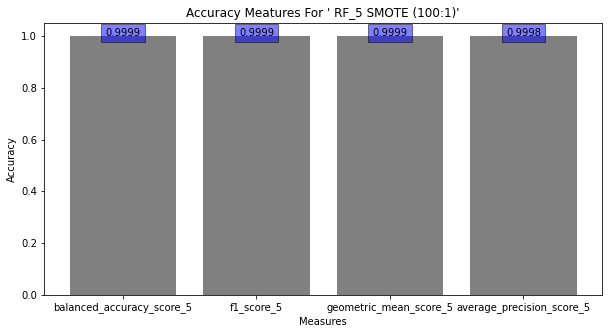

In [29]:
x = ["balanced_accuracy_score_5", "f1_score_5", "geometric_mean_score_5","average_precision_score_5"]
y = [round(Rf_Model_5[0],4), round(Rf_Model_5[1],4), round(Rf_Model_5[2],4), round(Rf_Model_5[3],4)]
barPlotChart(x,y," RF_5 SMOTE (100:1)")

TN:56712 FP:12 FN:1 TP:57001 FNR=1.754324409669836e-05 FPR=0.0002115506663845991


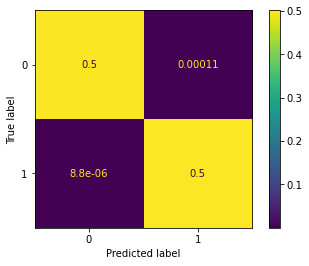

In [30]:
show(*confusion(model_5,X_test_5,y_test_5))

********

- ## 6- Mammography dataset using knn classification algorithm with (k=30) - (without oversampling):

In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
import sklearn
sklearn.set_config(print_changed_only=True)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import warnings
from functions import *
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [32]:
# from imblearn.datasets import fetch_datasets
# xx = fetch_datasets()['mammography']
# df = pd.DataFrame(xx.data)
# # df.to_csv('/tmp/tmp.csv')

### Import mammography DataSet:

In [33]:
from imblearn.datasets import fetch_datasets
df_6 = fetch_datasets()["mammography"]
X_6, y_6 = df_6.data, df_6.target

In [34]:
# Split the data
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_6, y_6, test_size = 0.2, random_state = 0)
# Build the model with k=30
model_6 = KNeighborsClassifier(n_neighbors=30)
# apply the model on thw data
model_6.fit(X_train_6, y_train_6)
# predict the test data to check the model ccuracy
knn_y_predict_6 = model_6.predict(X_test_6)

In [35]:
# Get the accuracy measures:
from sklearn.metrics import balanced_accuracy_score , f1_score ,  average_precision_score
from imblearn.metrics import geometric_mean_score
Knn_Model_6 = getAccuracyMeasures(y_test_6, knn_y_predict_6)
print("balanced_accuracy_score_6 :", Knn_Model_6[0])
print("f1_score_6                :", Knn_Model_6[1])
print("geometric_mean_score_6    :", Knn_Model_6[2])
print("average_precision_score_6 :", Knn_Model_6[3])

balanced_accuracy_score_6 : 0.6877634943672679
f1_score_6                : 0.5194805194805195
geometric_mean_score_6    : 0.6137323177081628
average_precision_score_6 : 0.3292173086709233


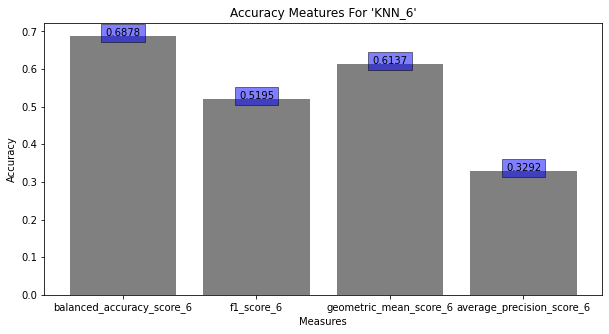

In [36]:
x = ["balanced_accuracy_score_6", "f1_score_6", "geometric_mean_score_6","average_precision_score_6"]
y = [round(Knn_Model_6[0],4), round(Knn_Model_6[1],4), round(Knn_Model_6[2],4), round(Knn_Model_6[3],4)]
barPlotChart(x,y, "KNN_6")

- We notice here that KNN is worst than Rndom forst on imbalanced data.

**********

- ## 7- Mammography dataset using knn classification algorithm with (k=30) - (with SMOTE):

In [37]:
from imblearn.datasets import fetch_datasets
df_7 = fetch_datasets()["mammography"]
X_7, y_7 = df_7.data, df_7.target

In [38]:
# count the samples for each class before applying SMOTE
Counter(y_7)

Counter({-1: 10923, 1: 260})

In [39]:
# apply the SMOTE model on the data
SMOTE_model_7 = SMOTE()
X_7, y_7 = SMOTE_model_7.fit_resample(X_7, y_7)

In [40]:
# count the samples for each class after applying SMOTE
Counter(y_7)

Counter({-1: 10923, 1: 10923})

In [41]:
# Split the data
X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(X_7, y_7, test_size = 0.2, random_state = 0)
# Build the model with k=30
model_7 = KNeighborsClassifier(n_neighbors=30)
# apply the model on thw data
model_7.fit(X_train_7, y_train_7)
# predict the test data to check the model ccuracy
knn_y_predict_7 = model_7.predict(X_test_7)

In [42]:
# Get the accuracy measures:
from sklearn.metrics import balanced_accuracy_score , f1_score ,  average_precision_score
from imblearn.metrics import geometric_mean_score
Knn_Model_7 = getAccuracyMeasures(y_test_7, knn_y_predict_7)
print("balanced_accuracy_score_7 :", Knn_Model_7[0])
print("f1_score_7                :", Knn_Model_7[1])
print("geometric_mean_score_7    :", Knn_Model_7[2])
print("average_precision_score_7 :", Knn_Model_7[3])

balanced_accuracy_score_7 : 0.9520330568124686
f1_score_7                : 0.9517906336088154
geometric_mean_score_7    : 0.9520020052494609
average_precision_score_7 : 0.9258757558295438


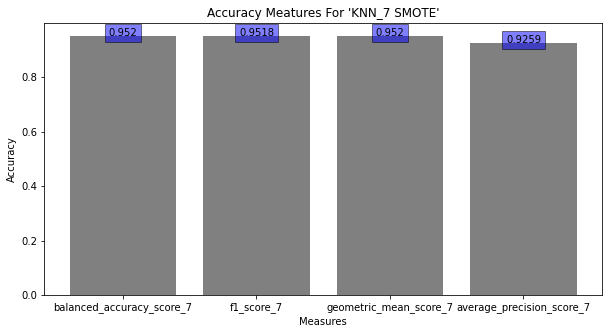

In [43]:
x = ["balanced_accuracy_score_7", "f1_score_7", "geometric_mean_score_7","average_precision_score_7"]
y = [round(Knn_Model_7[0],4), round(Knn_Model_7[1],4), round(Knn_Model_7[2],4), round(Knn_Model_7[3],4)]
barPlotChart(x,y, "KNN_7 SMOTE")

- We can see how much knn model became better after applying oversampling using SMOTE.

********

- Let's Build a data fram of our results to compare between of them easly:

In [44]:
import pandas as pd
  
# Initialize data to lists.
accuracy_data=[{'Case': "Rf_Model_1", 'Balanced_Accuracy': Rf_Model_1[0], 'F1': Rf_Model_1[1], "G_mean": Rf_Model_1[2], "APS":Rf_Model_1[3]},
               {'Case': "Rf_Model_2", 'Balanced_Accuracy': Rf_Model_2[0], 'F1': Rf_Model_2[1], "G_mean": Rf_Model_2[2], "APS":Rf_Model_2[3]},
               {'Case': "Rf_Model_3", 'Balanced_Accuracy': Rf_Model_3[0], 'F1': Rf_Model_3[1], "G_mean": Rf_Model_3[2], "APS":Rf_Model_3[3]},
               {'Case': "Rf_Model_4", 'Balanced_Accuracy': Rf_Model_4[0], 'F1': Rf_Model_4[1], "G_mean": Rf_Model_4[2], "APS":Rf_Model_4[3]},
               {'Case': "Rf_Model_5", 'Balanced_Accuracy': Rf_Model_5[0], 'F1': Rf_Model_5[1], "G_mean": Rf_Model_5[2], "APS":Rf_Model_5[3]},
               {'Case': "Knn_Model_6", 'Balanced_Accuracy':Knn_Model_6[0],'F1': Knn_Model_6[1],"G_mean": Knn_Model_6[2],"APS":Knn_Model_6[3]},
               {'Case': "Knn_Model_7", 'Balanced_Accuracy':Knn_Model_7[0],'F1': Knn_Model_7[1],"G_mean": Knn_Model_7[2],"APS":Knn_Model_7[3]}
                ]
results_df = pd.DataFrame(accuracy_data)
results_df

Case  Balanced_Accuracy        F1    G_mean       APS
0   Rf_Model_1           0.895987  0.855615  0.889941  0.737187
1   Rf_Model_2           0.891045  0.854054  0.884370  0.736006
2   Rf_Model_3           0.886095  0.847826  0.878754  0.726158
3   Rf_Model_4           0.999894  0.999895  0.999894  0.999798
4   Rf_Model_5           0.999885  0.999886  0.999885  0.999781
5  Knn_Model_6           0.687763  0.519481  0.613732  0.329217
6  Knn_Model_7           0.952033  0.951791  0.952002  0.925876

In [45]:
results_df.to_csv("Accuracy_Results_RF_KNN.csv", index=False) # SAVE THE FILE ON CSV 

****

Read the results:

In [2]:
import pandas as pd
import numpy as np
our_results_df = pd.read_csv("Accuracy_Results_RF_KNN.csv")

In [3]:
our_results_df

Case  Balanced_Accuracy        F1    G_mean       APS
0   Rf_Model_1           0.895987  0.855615  0.889941  0.737187
1   Rf_Model_2           0.891045  0.854054  0.884370  0.736006
2   Rf_Model_3           0.886095  0.847826  0.878754  0.726158
3   Rf_Model_4           0.999894  0.999895  0.999894  0.999798
4   Rf_Model_5           0.999885  0.999886  0.999885  0.999781
5  Knn_Model_6           0.687763  0.519481  0.613732  0.329217
6  Knn_Model_7           0.952033  0.951791  0.952002  0.925876

Text(0, 0.5, 'Measures')

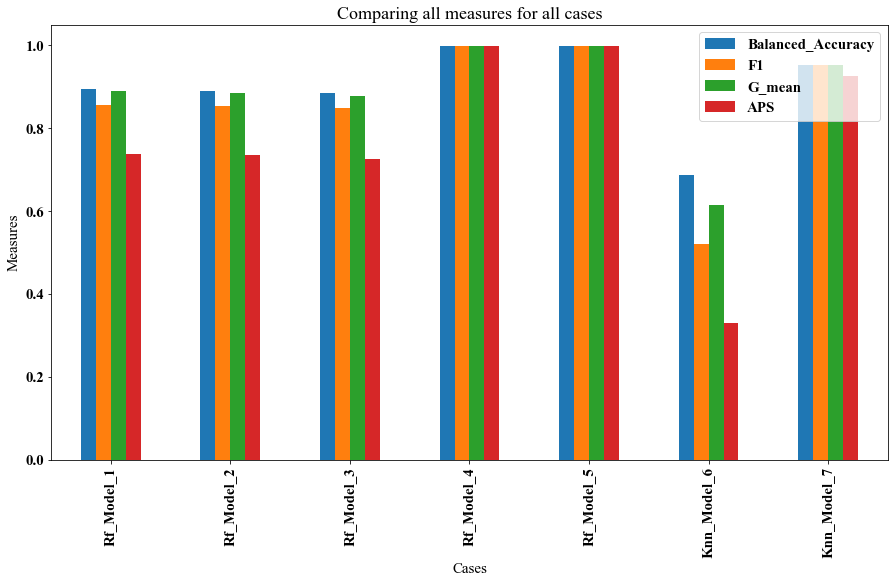

In [122]:
# plotting graph
our_results_df.plot(x="Case", y=["Balanced_Accuracy","F1","G_mean","APS"], kind="bar",figsize=(15,8))
plt.title("Comparing all measures for all cases")
plt.xlabel('Cases')
plt.ylabel('Measures')

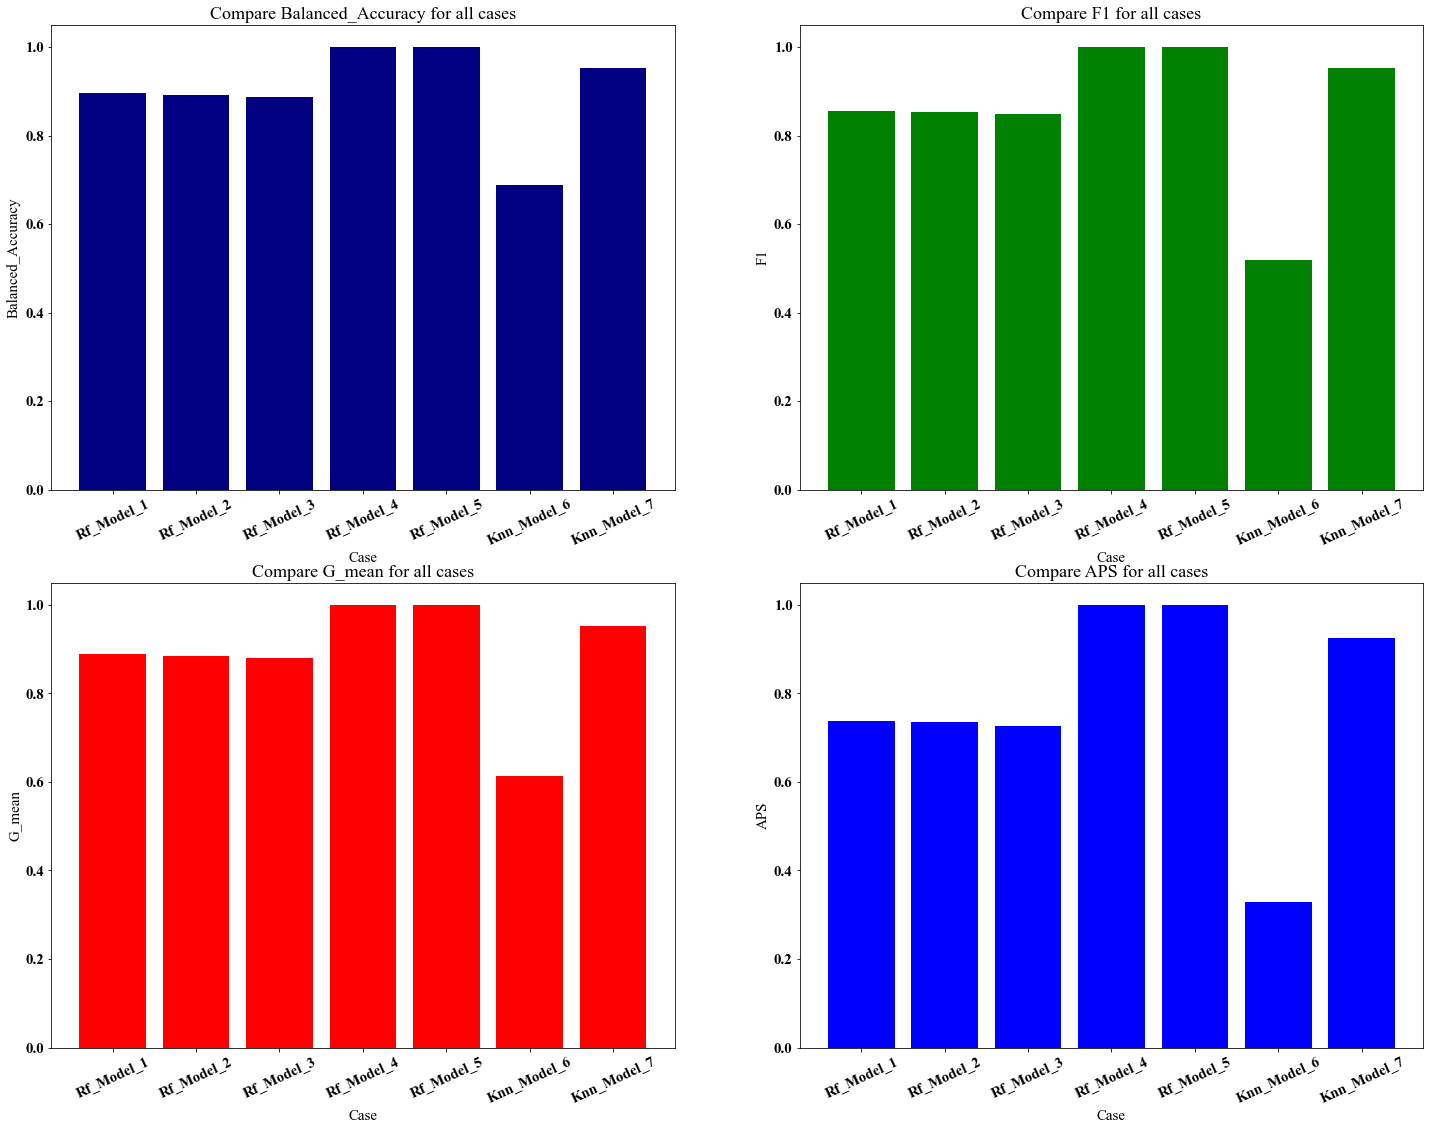

In [120]:
fig, ax = plt.subplots(figsize=(20, 15))
fig.tight_layout()
cases_list = ["Balanced_Accuracy","F1","G_mean","APS"]
colored_list = ["navy", "green", "red", "blue"]
for i in range(len(cases_list)):
    plt.subplot(2, 2, i+1)
    plt.bar(our_results_df["Case"],our_results_df[cases_list[i]], color=colored_list[i])
    plt.title('Compare '+cases_list[i]+' for all cases')
    plt.xlabel('Case')
    plt.ylabel(cases_list[i])
    plt.xticks(rotation=25)

plt.show()
fig.savefig('compare results for all cases.pdf')

- we notice that model4 and mode5 gave use best results (It's RF after applyimg SMOTE Oversambling algorithm), and here we can find how much SMOTE is important.

*********

<h1><u><center><font color="gray">References

1-  [Kaggle: Imbalanced weighted random forst.](https://www.kaggle.com/christiantheilhave/class-imbalance-with-weighted-random-forest)
<br>
2-  [Sklearn: RandomForst.](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
<br>
3-  [Sklearn: KNeighborsClassifier.](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
<br>
4- [Imbalanced Data.](https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/)
<br>
5- [Kaggle: EVALUATION METRICS,](https://www.kaggle.com/code/kaanboke/the-most-common-evaluation-metrics-a-gentle-intro)
<br>
6- [Bar plot,](https://www.kaggle.com/code/alexisbcook/bar-charts-and-heatmaps)
<br>
7- [Kaggle: Scatter plot,](https://www.kaggle.com/code/alexisbcook/scatter-plots)


**********